In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('social.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Scaling the the predictor variables, and converting it to numpy arrays.

In [3]:
df_indepent= df[['Age','EstimatedSalary']]
mean = np.mean(df_indepent)
std = np.std(df_indepent)
df_indepent = (df_indepent - mean) / std
df_indepent = df_indepent.to_numpy()
df_y=df[['Purchased']]
df_y = df_y.replace(0,-1)
df_y = df_y.to_numpy()

Randomly taking 75% for training and 25% for testing.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df_indepent, df_y, test_size=0.25, random_state=42)

#x_train = df_indepent.iloc[0:301,].to_numpy()
#x_test = df_indepent.iloc[301:,].to_numpy()
#y_train = df_y.iloc[0:301,].to_numpy()
#y_test = df_y.iloc[301:,].to_numpy()

Implementing SVM algorithm

In [69]:
import numpy as np 


class SVM:
# learning rate = 0.0001 with iterartins =1000
    def __init__(self, learning_rate=0.0001,  n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None
# function to fit the training data

    def fit(self, X, y,C):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        print('shape1',self.w.shape)
        self.b = 0

        for i in range(self.n_iters):
            w_r_t_w = self.w.T
            w_r_t_b = 0
            for idx, x_i in enumerate(X):
                # Implementing the cost funtion
                print('x_i_shape',x_i.shape)
                t_n = y_[idx]* (np.dot(self.w.T,x_i) + self.b) 
                l_t = max(0,1-t_n)
                cost = 1/2 * np.dot(self.w, self.w) + l_t
                
                # implementing the subgradient condition
                if t_n < 1:
                    g_t = -1
                else:
                    g_t = 0
                    
                # implementing gradient descent
                w_r_t_w -=  C * (g_t * (y_[idx] * x_i))
                w_r_t_b -=  C * (g_t * y_[idx])
            [self.w,self.b] = np.array([self.w,self.b]).T - self.lr * np.array([w_r_t_w , w_r_t_b]).T 
            
                
# function to predict the test data

    def predict(self, X):
        approx = np.dot(X, self.w ) - self.b
        return np.sign(approx)

In [70]:
clf = SVM()

Fit for training with C = 50

In [71]:
clf.fit(x_train,y_train,50)

shape1 (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,

x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape 

x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape 

x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape 

x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape 

x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape 

x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape 

x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape 

x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape 

x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape (2,)
x_i_shape 

KeyboardInterrupt: 

In [56]:
print(clf.w, clf.b)

[620.97911049 310.60193814] [539.095]


Output of the predict function

In [59]:
clf.predict(x_test)

array([-1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1., -1.])

Confusion table for C =50

In [34]:
y_actu = y_test
y_pred = clf.predict(x_test)
cm=confusion_matrix(y_actu, y_pred)

In [35]:
confusion_table = pd.DataFrame(cm, index = ['predicted= 1','predicted= -1'], columns = ['Actual= 1','Actual= -1'] )

In [36]:
confusion_table

,Actual= 1,Actual= -1
predicted= 1,63,0
predicted= -1,14,23


# 86% of test data was classified correctly

Fiting for C=100 and Confusion table

In [37]:
clf.fit(x_train,y_train,100)

cost 0 -- 37831.16261396494
cost 1 -- 23157.158893771197
cost 2 -- 15907.447166802931
cost 3 -- 26881.71261616815
cost 4 -- 28458.38227928276
cost 5 -- 11114.191038828983
cost 6 -- 36070.12848461829
cost 7 -- 26885.806326444294
cost 8 -- 28430.377306935206
cost 9 -- 15198.394729851057
cost 10 -- 27106.94890033117
cost 11 -- 21234.807534995492
cost 12 -- 22224.21288345884
cost 13 -- 19928.259790457007
cost 14 -- 20370.571286474893
cost 15 -- 20935.557112401046
cost 16 -- 25001.663785854907
cost 17 -- 22713.697446037495
cost 18 -- 25176.81083902642
cost 19 -- 26562.243405201294
cost 20 -- 30781.879673949137
cost 21 -- 20715.1083402437
cost 22 -- 37915.6590899117
cost 23 -- 22250.13411307159
cost 24 -- 20215.420567267254
cost 25 -- 20894.16368375055
cost 26 -- 22229.384822078602
cost 27 -- 20223.79189033606
cost 28 -- 22957.48160106659
cost 29 -- 20872.400343445217
cost 30 -- 48941.54619895601
cost 31 -- 25490.72703565399
cost 32 -- 16836.164426415646
cost 33 -- 24193.367317081756
cost 34

cost 300 -- [63446.85480285]
cost 301 -- [56014.080733]
cost 302 -- [99549.26909339]
cost 303 -- [54626.65541122]
cost 304 -- [67053.70613976]
cost 305 -- [56963.04882349]
cost 306 -- [61549.74343854]
cost 307 -- [83866.31346264]
cost 308 -- [54359.74776573]
cost 309 -- [67267.06407066]
cost 310 -- [105035.81460934]
cost 311 -- [63549.82247639]
cost 312 -- [58865.9301894]
cost 313 -- [85975.98110512]
cost 314 -- [56060.37135314]
cost 315 -- [69120.51112969]
cost 316 -- [90156.42873638]
cost 317 -- [59443.86376394]
cost 318 -- [72693.08125633]
cost 319 -- [94443.70685928]
cost 320 -- [67745.87083461]
cost 321 -- [89445.02959022]
cost 322 -- [58868.27949822]
cost 323 -- [67284.0933312]
cost 324 -- [61847.01491779]
cost 325 -- [89736.4449043]
cost 326 -- [43440.79945727]
cost 327 -- [71087.8869818]
cost 328 -- [69571.48170927]
cost 329 -- [60590.53471705]
cost 330 -- [49580.67759808]
cost 331 -- [43213.48538074]
cost 332 -- [98135.7549558]
cost 333 -- [55022.01593892]
cost 334 -- [60583.3

cost 600 -- [283580.29254261]
cost 601 -- [218551.47397545]
cost 602 -- [264558.98665327]
cost 603 -- [289881.42212047]
cost 604 -- [224084.59159329]
cost 605 -- [270633.36856343]
cost 606 -- [212949.36537358]
cost 607 -- [258124.08947113]
cost 608 -- [238709.71864617]
cost 609 -- [274208.37588769]
cost 610 -- [254348.37316149]
cost 611 -- [256054.35986766]
cost 612 -- [255834.87512816]
cost 613 -- [255121.70623691]
cost 614 -- [279854.36479905]
cost 615 -- [215300.38484561]
cost 616 -- [273440.31591504]
cost 617 -- [299184.90038068]
cost 618 -- [232271.18971198]
cost 619 -- [279613.18029988]
cost 620 -- [306137.16876012]
cost 621 -- [238413.55143897]
cost 622 -- [262584.7289261]
cost 623 -- [288169.06810033]
cost 624 -- [266314.752146]
cost 625 -- [291304.11597566]
cost 626 -- [318287.21949094]
cost 627 -- [249173.7341673]
cost 628 -- [273708.29884936]
cost 629 -- [299655.91599093]
cost 630 -- [278875.53869753]
cost 631 -- [269711.96876104]
cost 632 -- [320148.63941453]
cost 633 -- [2

cost 883 -- [614420.61691706]
cost 884 -- [654213.44420899]
cost 885 -- [669100.74868313]
cost 886 -- [610178.54575312]
cost 887 -- [655920.48683724]
cost 888 -- [648900.21731581]
cost 889 -- [663361.0372145]
cost 890 -- [655198.93642963]
cost 891 -- [665082.71059089]
cost 892 -- [708921.45582583]
cost 893 -- [648036.33979904]
cost 894 -- [693040.29198646]
cost 895 -- [609274.4586306]
cost 896 -- [649338.08419851]
cost 897 -- [663241.17967997]
cost 898 -- [632769.82700027]
cost 899 -- [679276.20574023]
cost 900 -- [671969.10167683]
cost 901 -- [686878.13312321]
cost 902 -- [678429.22195307]
cost 903 -- [595565.48179635]
cost 904 -- [637479.4798249]
cost 905 -- [601317.15406173]
cost 906 -- [643280.44103968]
cost 907 -- [607141.40511191]
cost 908 -- [649153.95643698]
cost 909 -- [613038.19094484]
cost 910 -- [655099.98202556]
cost 911 -- [619007.46757907]
cost 912 -- [661118.47383481]
cost 913 -- [702753.96309951]
cost 914 -- [717288.79514262]
cost 915 -- [709202.69817578]
cost 916 -- [

In [38]:
clf.predict(x_test)

array([-1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1., -1.])

In [39]:
y_actu = y_test
y_pred = clf.predict(x_test)
cm=confusion_matrix(y_actu, y_pred)

In [40]:
confusion_table = pd.DataFrame(cm, index = ['predicted= 1','predicted= -1'], columns = ['Actual= 1','Actual= -1'] )

In [41]:
confusion_table

,Actual= 1,Actual= -1
predicted= 1,63,0
predicted= -1,16,21


# when C=100 the accuracy goes down. It causes the decision boundary shift towards the -1 label.

Fiting for C = 1, and confusion table

In [18]:
clf.fit(x_train,y_train,1)

cost 0 -- 6.538988391535193
cost 1 -- 6.254995941470548
cost 2 -- 7.186703703559514
cost 3 -- 6.055004090668364
cost 4 -- 5.027171578372458
cost 5 -- 6.663880361764091
cost 6 -- 6.331551084149766
cost 7 -- 6.449106090636917
cost 8 -- 3.918292973847234
cost 9 -- 6.338604252610093
cost 10 -- 7.384331925726967
cost 11 -- 7.43219756042817
cost 12 -- 6.639454937863035
cost 13 -- 5.882701644393407
cost 14 -- 7.237896851325541
cost 15 -- 6.107094703384854
cost 16 -- 5.9742235739955385
cost 17 -- 7.31609579635022
cost 18 -- 7.007954025228709
cost 19 -- 4.1594229490387296
cost 20 -- 6.95557035015519
cost 21 -- 6.715208698224924
cost 22 -- 6.9540705334480775
cost 23 -- 4.118557678860131
cost 24 -- 6.150147650911067
cost 25 -- 4.315166048644904
cost 26 -- 6.404319225036881
cost 27 -- 6.692509297371543
cost 28 -- 6.039724995338166
cost 29 -- 7.1026149326418055
cost 30 -- 4.27811826519941
cost 31 -- 6.037640754894089
cost 32 -- 6.670149612799796
cost 33 -- 5.658620011669816
cost 34 -- 5.22987280137

cost 308 -- [11.74567831]
cost 309 -- [11.96373313]
cost 310 -- [10.74641364]
cost 311 -- [11.61167189]
cost 312 -- [12.24810644]
cost 313 -- [12.42158034]
cost 314 -- [11.82217354]
cost 315 -- [11.31561605]
cost 316 -- [13.75939863]
cost 317 -- [11.83295189]
cost 318 -- [11.35854664]
cost 319 -- [12.75011308]
cost 320 -- [14.19611728]
cost 321 -- [15.06848038]
cost 322 -- [11.40093639]
cost 323 -- [12.72986699]
cost 324 -- [13.13393508]
cost 325 -- [12.47162925]
cost 326 -- [13.41117231]
cost 327 -- [12.78566897]
cost 328 -- [16.71327481]
cost 329 -- [10.7184278]
cost 330 -- [12.66829093]
cost 331 -- [13.4651755]
cost 332 -- [14.71176678]
cost 333 -- [14.73477523]
cost 334 -- [15.62080202]
cost 335 -- [13.20346792]
cost 336 -- [13.17074317]
cost 337 -- [14.33085241]
cost 338 -- [13.75704601]
cost 339 -- [13.69986913]
cost 340 -- [13.09865458]
cost 341 -- [12.16594381]
cost 342 -- [14.30501151]
cost 343 -- [13.74761526]
cost 344 -- [13.67172516]
cost 345 -- [11.91797624]
cost 346 -- [1

cost 632 -- [42.28132252]
cost 633 -- [44.51186227]
cost 634 -- [46.86308859]
cost 635 -- [44.96617731]
cost 636 -- [47.94186295]
cost 637 -- [44.85375274]
cost 638 -- [42.24728715]
cost 639 -- [45.88274283]
cost 640 -- [48.28351609]
cost 641 -- [46.31837589]
cost 642 -- [49.34919371]
cost 643 -- [46.24352573]
cost 644 -- [43.56326738]
cost 645 -- [45.82750982]
cost 646 -- [48.2124287]
cost 647 -- [46.28987376]
cost 648 -- [50.78041087]
cost 649 -- [47.65719587]
cost 650 -- [44.90315096]
cost 651 -- [47.21691147]
cost 652 -- [44.7790952]
cost 653 -- [48.3669705]
cost 654 -- [51.50108075]
cost 655 -- [49.60007007]
cost 656 -- [47.74752291]
cost 657 -- [45.30015331]
cost 658 -- [48.89795341]
cost 659 -- [52.05243339]
cost 660 -- [50.14263705]
cost 661 -- [48.28130686]
cost 662 -- [45.82438802]
cost 663 -- [49.43210729]
cost 664 -- [52.60694613]
cost 665 -- [50.68836784]
cost 666 -- [48.1479578]
cost 667 -- [45.72860421]
cost 668 -- [50.15065921]
cost 669 -- [47.6271222]
cost 670 -- [51.3

cost 951 -- [103.72812589]
cost 952 -- [103.36599955]
cost 953 -- [104.47769102]
cost 954 -- [104.0013899]
cost 955 -- [94.23955528]
cost 956 -- [102.06659907]
cost 957 -- [101.78209526]
cost 958 -- [102.78823596]
cost 959 -- [102.38944753]
cost 960 -- [103.54611179]
cost 961 -- [103.03315429]
cost 962 -- [113.08576437]
cost 963 -- [102.85130874]
cost 964 -- [102.53903904]
cost 965 -- [103.58295797]
cost 966 -- [103.15660709]
cost 967 -- [104.35103995]
cost 968 -- [103.81052344]
cost 969 -- [113.91175075]
cost 970 -- [103.63976631]
cost 971 -- [103.29994911]
cost 972 -- [112.14666532]
cost 973 -- [101.96488892]
cost 974 -- [112.84623795]
cost 975 -- [102.62994808]
cost 976 -- [113.58214637]
cost 977 -- [103.33134265]
cost 978 -- [102.99832314]
cost 979 -- [111.13112603]
cost 980 -- [101.00660688]
cost 981 -- [111.83901628]
cost 982 -- [111.56472977]
cost 983 -- [112.58234843]
cost 984 -- [112.19377055]
cost 985 -- [112.49465156]
cost 986 -- [111.93397309]
cost 987 -- [111.74617143]
cos

In [19]:
clf.predict(x_test)

array([-1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1., -1.])

In [20]:
y_actu = y_test
y_pred = clf.predict(x_test)
cm=confusion_matrix(y_actu, y_pred)

In [21]:
confusion_table = pd.DataFrame(cm, index = ['predicted= 1','predicted= -1'], columns = ['Actual= 1','Actual= -1'] )

In [22]:
confusion_table

,Actual= 1,Actual= -1
predicted= 1,62,1
predicted= -1,14,23


# When C=1, the accuracy is affected, and the boundary is shifted towards 1 labels. 

# C=50 is the best parameter because the decision boundary is not shifted towards any label thus the accuracy is greater.

In [23]:
#Visualizing the training data

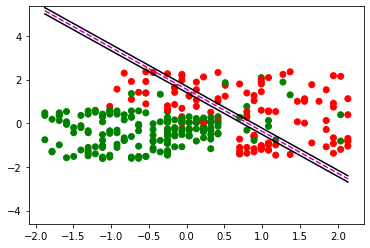

In [24]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    colors = ['green','red']
    labels=[1,-1]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    #plt.scatter(X[:,0], X[:,1], marker='o',c=y)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train.ravel(), cmap=matplotlib.colors.ListedColormap(colors))
    
    x0_1 = np.amin(x_train[:,0])
    x0_2 = np.amax(x_train[:,0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'm--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(x_train[:,1])
    x1_max = np.amax(x_train[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

visualize_svm()

In [25]:
#visualing the test data

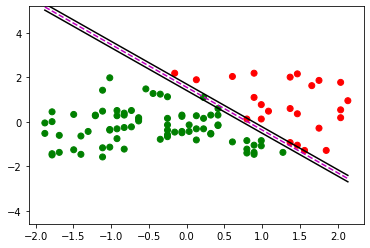

In [26]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    colors = ['green','red']
    labels=[1,-1]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    #plt.scatter(X[:,0], X[:,1], marker='o',c=y)
    plt.scatter(x_test[:,0], x_test[:,1], c=clf.predict(x_test).ravel(), cmap=matplotlib.colors.ListedColormap(colors))
    
    x0_1 = np.amin(x_test[:,0])
    x0_2 = np.amax(x_test[:,0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'm--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(x_test[:,1])
    x1_max = np.amax(x_test[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

visualize_svm()